In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import pandas_profiling
import sys,os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas.api.types as ptypes
from numpy.random import choice
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from random import randrange
import warnings
warnings.filterwarnings('ignore')
from scipy import integrate 

In [6]:
df=pd.read_csv('./data.csv')
print(df.columns)
df.head()
df.shape

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


(569, 32)

In [37]:
def load_data():
    df=pd.read_csv('./data.csv')
    df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
    y = df['diagnosis']
    X = df.drop(['diagnosis','id'],axis=1)
    return X,y
X,y =load_data()
feature_cols = X.columns.to_list()

In [14]:
feature_stats = X.describe().T[['mean','std','max','min']]
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


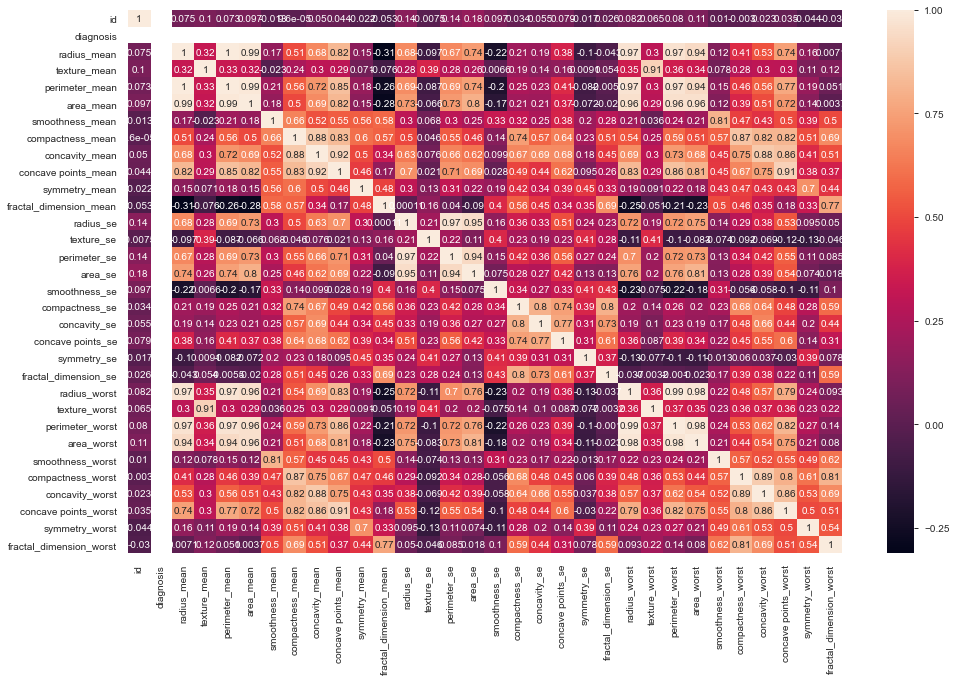

In [16]:
df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
corr_matrix = df.corr()
# plot the correlation heatmap
plt.figure(figsize=(16,10))

sns.heatmap(corr_matrix,annot=True,
        xticklabels=df.columns,
        yticklabels=df.columns)



#Correlation with output variable
cor_target = abs(corr_matrix["diagnosis"])

mean_correlation = abs(X.corr()).describe().T['mean']

corr_ranking = pd.DataFrame([cor_target,mean_correlation]).T.rename(columns={"diagnosis": "target_correlation", "mean": "mean_correlation"})
corr_ranking.drop(['id','diagnosis'],axis=0,inplace=True)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
ranking_names =map(lambda x: feature_cols[x],fit.ranking_)
print("Feature Ranking: %s" % list(ranking_names))

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True  True False False]
Feature Ranking: ['smoothness_mean', 'perimeter_se', 'smoothness_worst', 'concavity_worst', 'concave points_se', 'radius_se', 'area_mean', 'concavity_mean', 'smoothness_se', 'compactness_worst', 'texture_mean', 'concave points_mean', 'compactness_mean', 'compactness_se', 'symmetry_worst', 'area_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'concave points_worst', 'concavity_se', 'symmetry_mean', 'fractal_dimension_mean', 'area_worst', 'perimeter_worst', 'perimeter_mean', 'texture_mean', 'texture_mean', 'fractal_dimension_se', 'texture_se']


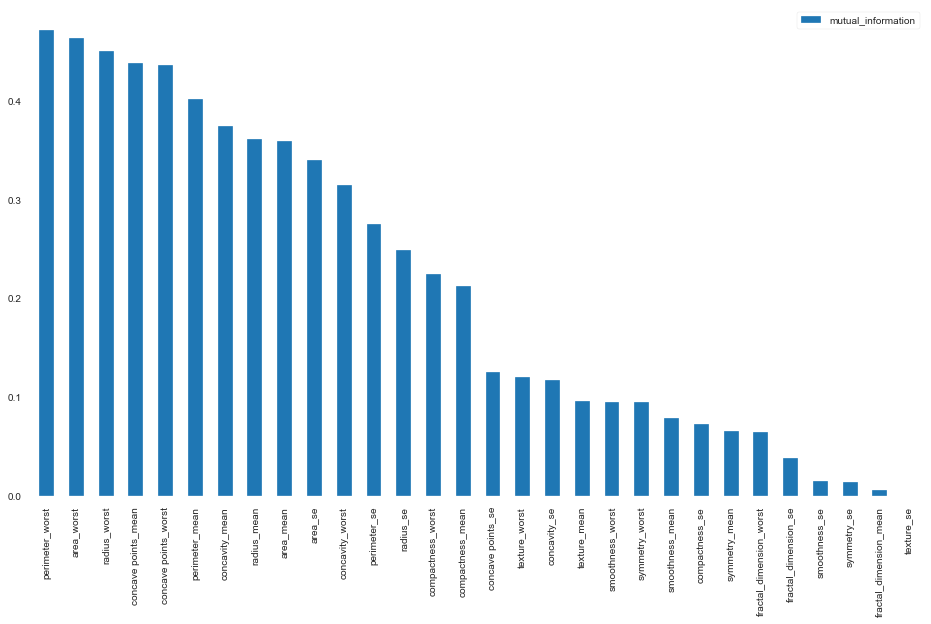

In [21]:
mutual_info = np.array(mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=42))

mutual_info= pd.DataFrame(mutual_info,columns=["mutual_information"],index=feature_cols)

mutual_info.sort_values(by='mutual_information',ascending=False)\
        .plot(kind='bar',figsize=(16,9));

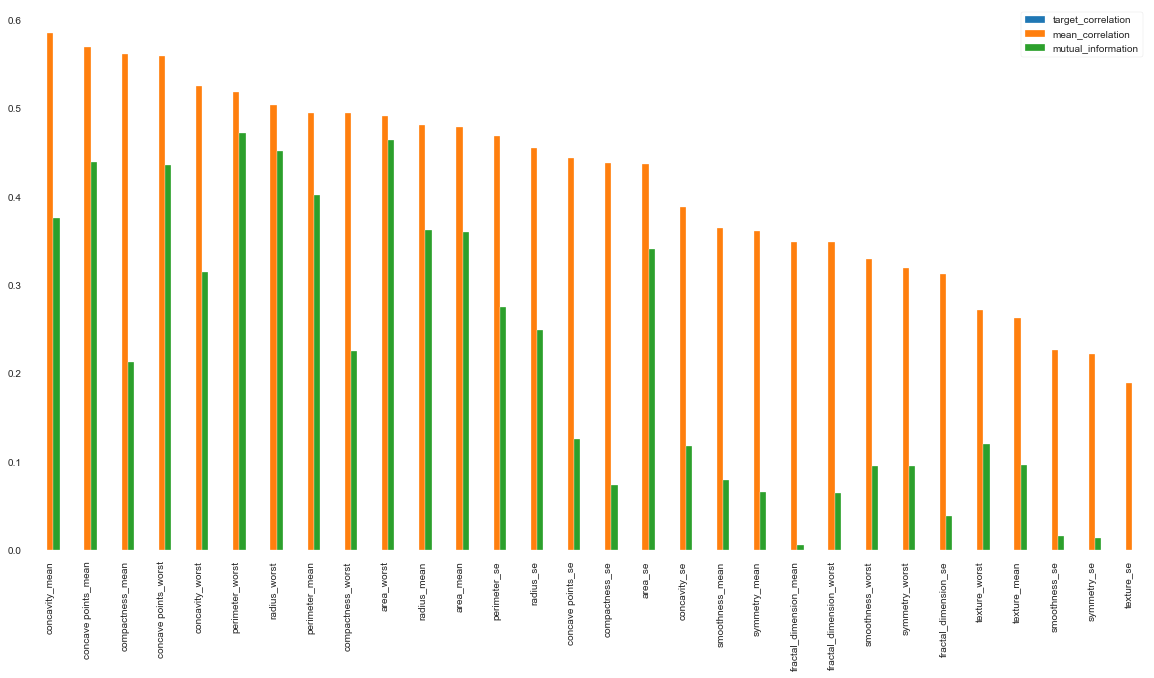

In [24]:
pd.concat([corr_ranking , mutual_info],axis=1).sort_values(by=['target_correlation','mean_correlation','mutual_information'],ascending=False).plot(kind='bar',figsize=(20,10));

In [28]:
from DataCorruption.DataCorruptor import NumericDataCorruptor
    
data_corruptor = NumericDataCorruptor(X,feature_stats,feature_cols)
data_corruptor.get_dataset_with_corrupted_col('radius_mean')

Corrutping 0.95 percent of : radius_mean


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.380000,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,NaN,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.380000,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,21.252985,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,30.202789,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,5.783612,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,12.967921,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,15.598652,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = X.select_dtypes(include="number").columns.to_list()#['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include="object").columns.to_list()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [33]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
clean_test_baseline= clf.score(X_test, y_test)
print("model score: %.3f" % clean_test_baseline)

model score: 0.965


In [117]:
#implement featureimportances attributes in random forest  to see the importance of a feature 
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print(" The Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s  (%f)" % (indices[f],feature_cols[indices[f]], importances[indices[f]]))

 The Feature ranking:
27. concave points_worst  (0.248557)
7. concave points_mean  (0.104563)
22. perimeter_worst  (0.100128)
23. area_worst  (0.088687)
3. area_mean  (0.077016)
0. radius_mean  (0.073494)
2. perimeter_mean  (0.070867)
12. perimeter_se  (0.053371)
21. texture_worst  (0.022916)
15. compactness_se  (0.019973)
13. area_se  (0.018420)
20. radius_worst  (0.017909)
28. symmetry_worst  (0.016252)
24. smoothness_worst  (0.013290)
26. concavity_worst  (0.013022)
6. concavity_mean  (0.010508)
10. radius_se  (0.007682)
1. texture_mean  (0.006313)
18. symmetry_se  (0.005830)
11. texture_se  (0.005825)
29. fractal_dimension_worst  (0.005700)
17. concave points_se  (0.003858)
4. smoothness_mean  (0.003791)
16. concavity_se  (0.003351)
19. fractal_dimension_se  (0.003161)
25. compactness_worst  (0.002300)
5. compactness_mean  (0.002062)
9. fractal_dimension_mean  (0.000877)
14. smoothness_se  (0.000275)
8. symmetry_mean  (0.000000)


In [127]:
X_test_RFE_top5=X_test[['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']]

In [130]:
#clf_rfe.fit(X_train_rfe,y_train_rfe)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X,y = load_data()
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X, y, test_size=0.2)

clf.fit(X_train_rfe, y_train_rfe)
clean_test_baseline= clf.score(X_test_rfe, y_test_rfe)
print("model score: %.3f" % clean_test_baseline)

model score: 0.956


In [126]:
#select the top 5 features from our RFE experiment  rather than corruption all columns  and then predicting the score
feature_cols_RFE_top5=['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']
data_corruptor = NumericDataCorruptor(X_test_RFE_top5,feature_stats,feature_cols_RFE_top5)
res= []
for idx,column in enumerate(feature_cols_RFE_top5):
    corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_col(column), y_test)
    loss = corrupted_score - clean_test_baseline
    res.append([column,corrupted_score,loss])
    print("model score: %.3f" % corrupted_score)

Corrutping 0.95 percent of : area_mean


ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 30 and input n_features is 5.

In [103]:
disrupted_feature_ranking = pd.concat([pd.DataFrame(res,columns=['feature','score','loss']),] ).sort_values(by='loss',ascending=False).drop('score',axis=1)

In [104]:
disrupted_feature_ranking

,feature,loss
0,area_mean,-0.043860
1,concavity_mean,-0.061404
2,area_se,-0.228070
3,concavity_worst,-0.236842
4,symmetry_worst,-0.263158


In [105]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.026020,0.037810,0.1780,0.05650,...,16.11,23.00,104.60,793.7,0.1216,0.16370,0.066480,0.08485,0.2404,0.06428
372,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.402400,0.19660,0.2730,0.08666
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.20700,0.243700,0.07828,0.2455,0.06596
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.30940,0.340300,0.14180,0.2218,0.07820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.450400,0.24300,0.3613,0.08758
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.25500,0.253400,0.08600,0.2605,0.08701
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.1851,0.40610,0.402400,0.17160,0.3383,0.10310
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,14.42,21.95,99.21,634.3,0.1288,0.32530,0.343900,0.09858,0.3596,0.09166


In [116]:
data_corruptor = NumericDataCorruptor(X_test,feature_stats,feature_cols_RFE_top5)

total_cells = X_test.shape[0] * X_test.shape[1]
res= []
for n in range(total_cells):
        corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
        res.append([(n/total_cells),corrupted_score])


IndexError: index 25 is out of bounds for axis 0 with size 5

In [115]:
data_corruptor = NumericDataCorruptor(X_test,feature_stats,feature_cols)
data_corruptor.get_dataset_with_corrupted_cell()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.026020,0.037810,0.1780,0.05650,...,16.11,23.00,104.60,793.7,0.1216,0.16370,0.066480,0.08485,0.2404,0.06428
372,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.402400,0.19660,0.2730,0.08666
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.20700,0.243700,0.07828,0.2455,0.06596
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.30940,0.340300,0.14180,0.2218,0.07820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.450400,0.24300,0.3613,0.08758
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.25500,0.253400,0.08600,0.2605,0.08701
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.1851,0.40610,0.402400,0.17160,0.3383,0.10310
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,14.42,21.95,99.21,634.3,0.1288,0.32530,0.343900,0.09858,0.3596,0.09166
